In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.autolayout'] = True

SAVE_PLOTS = True
STANDARD_DPI = 300
FIGSIZE = (5, 3)
DOTSIZE = 5

In [61]:
def get_data(pmt_number, is_terminated):
    data_path = f'data/dark_pmt/pmt{pmt_number}/I_V_noise_700_2285V'
    data_path += '_50ohm.csv' if is_terminated else '.csv'
    return pd.read_csv(data_path)


def generate_save_path(pmt_number, is_terminated, filename):
    plot_path = f'plots/pmt_noise_tests/pmt{pmt_number}/{filename}'
    plot_path += '_50ohm' if is_terminated else ''
    plot_path += '.jpg'
    return plot_path


def generate_plot_title(quantity_name, pmt_number, is_terminated: bool):
    plot_title = quantity_name
    plot_title += ' - '
    plot_title += f'PMT {pmt_number}'
    plot_title += ' , '
    plot_title += r' 50$\Omega$ term.' if is_terminated else r' 1$M\Omega$ term.'
    return plot_title

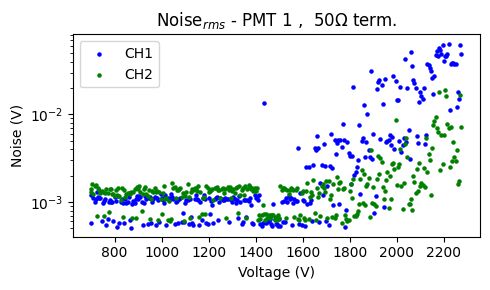

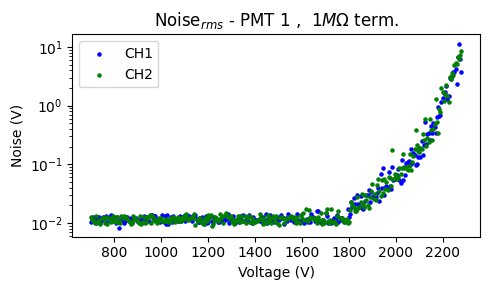

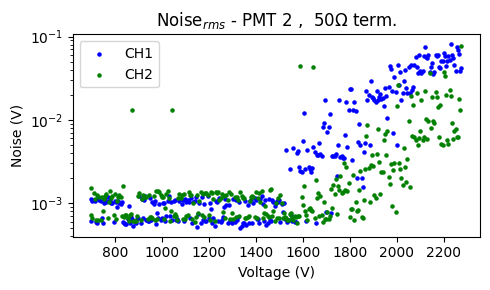

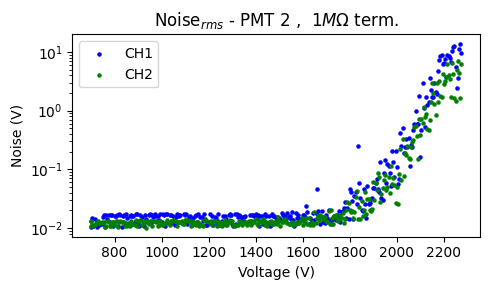

In [62]:
def plot_rms(pmt_number, is_terminated):
    noise_data = get_data(pmt_number, is_terminated)
    fig, ax = plt.subplots(figsize=FIGSIZE)
    noise_rms_ch1 = noise_data['v_rms_ch1']
    noise_rms_ch2 = noise_data['v_rms_ch2']
    V = noise_data['pmt_high_voltage']

    ax.scatter(V, noise_rms_ch1, color='blue', label='CH1', s=DOTSIZE)
    ax.scatter(V, noise_rms_ch2, color='green', label='CH2', s=DOTSIZE)

    # log scale
    ax.set_yscale('log')
    ax.set_ylabel(f'Noise (V)')
    ax.set_xlabel('Voltage (V)')
    plot_title = generate_plot_title(
        r'Noise$_{rms}$', pmt_number, is_terminated)
    ax.set_title(plot_title)
    plt.legend()
    if SAVE_PLOTS:
        save_path = generate_save_path(
            pmt_number, is_terminated, 'V_noise_rms')
        plt.savefig(save_path, dpi=STANDARD_DPI, bbox_inches='tight')
    plt.show()


for pmt_number in range(1, 3):
    for is_terminated in [True, False]:
        plot_rms(pmt_number, is_terminated)

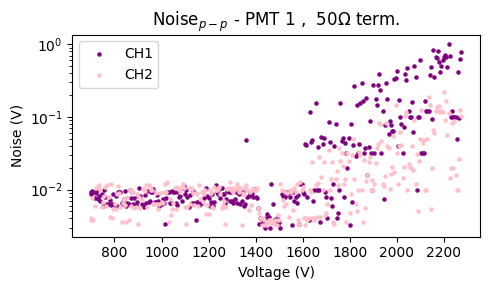

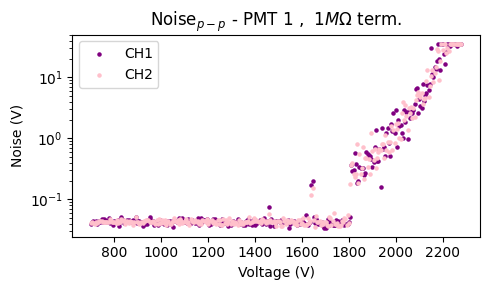

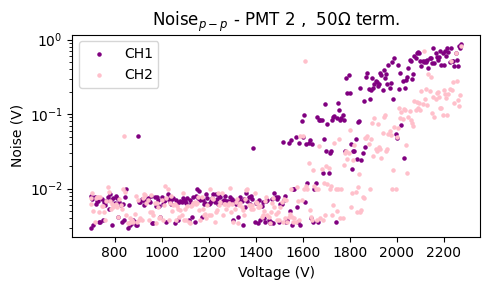

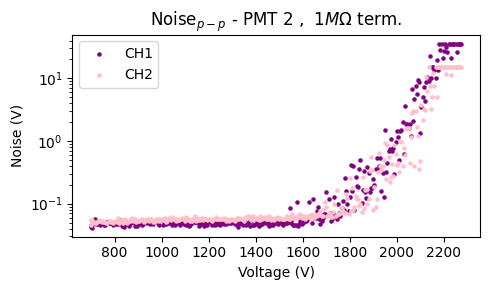

In [63]:

def plot_p2p(pmt_number, is_terminated):
    noise_data = get_data(pmt_number, is_terminated)
    fig, ax = plt.subplots(figsize=FIGSIZE)
    noise_p2p_ch1 = noise_data['v_p2p_ch1']
    noise_p2p_ch2 = noise_data['v_p2p_ch2']
    V = noise_data['pmt_high_voltage']

    ax.scatter(V, noise_p2p_ch1, color='purple', label='CH1', s=DOTSIZE)
    ax.scatter(V, noise_p2p_ch2, color='pink', label='CH2', s=DOTSIZE)

    # log scale
    ax.set_yscale('log')
    ax.set_ylabel(f'Noise (V)')
    ax.set_xlabel('Voltage (V)')
    plot_title = generate_plot_title(
        r'Noise$_{p-p}$', pmt_number, is_terminated)
    ax.set_title(plot_title)
    plt.legend()

    if SAVE_PLOTS:
        save_path = generate_save_path(
            pmt_number, is_terminated, 'V_noise_p2p')
        plt.savefig(save_path, dpi=STANDARD_DPI, bbox_inches='tight')

    plt.show()


for pmt_number in range(1, 3):
    for is_terminated in [True, False]:
        plot_p2p(pmt_number, is_terminated)